In [1]:
# Installer YOLOv8 via Ultralytics
!pip install ultralytics

# Vérifier l'installation
from ultralytics import YOLO
print("YOLOv8 est prêt à l'emploi !")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
import os
import shutil
import random

# Chemins des dossiers
base_dir = '/content/drive/MyDrive/OCR FINAL/DATA'
images_dir = os.path.join(base_dir, 'images')
labels_dir = os.path.join(base_dir, 'labels')

# Créer les dossiers train, val, test
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'labels', split), exist_ok=True)

# Liste des images
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg'))]
random.shuffle(image_files)

# Répartition des données
train_split = int(0.7 * len(image_files))
val_split = int(0.85 * len(image_files))

# Diviser les données
splits = {
    'train': image_files[:train_split],
    'val': image_files[train_split:val_split],
    'test': image_files[val_split:]
}

# Vérification des annotations manquantes
missing_labels = []

# Copier les fichiers avec vérification
for split, files in splits.items():
    for file in files:
        img_src = os.path.join(images_dir, file)
        lbl_src = os.path.join(labels_dir, file.rsplit('.', 1)[0] + '.txt')  # Gestion des extensions

        # Vérification de l'existence du fichier d'annotation
        if os.path.exists(lbl_src):
            shutil.copy(img_src, os.path.join(base_dir, 'images', split, file))
            shutil.copy(lbl_src, os.path.join(base_dir, 'labels', split, file.rsplit('.', 1)[0] + '.txt'))
        else:
            missing_labels.append(file)

# Afficher les fichiers manquants
if missing_labels:
    print("⚠️ Fichiers d'annotations manquants pour :")
    for missing in missing_labels:
        print(f"- {missing}")
else:
    print("✅ Toutes les images ont des annotations correspondantes.")


⚠️ Fichiers d'annotations manquants pour :
- 20200614_130217a.jpg
- 20200614_130203a.jpg
- 20200614_130201a.jpg
- 20200623_173010a.jpg
- 20200622_201519a.jpg
- 20200614_161843(0)___ADD_1___ADD_2.jpg
- 20200614_161246.jpg
- 20200614_204527a.jpg
- 20200614_204530a.jpg
- 20200614_204344a.jpg
- 20200620_194127___ADD_1___ADD_2a.jpg
- 20200622_201602___ADD_1a.jpg
- 20200614_151933.jpg
- 20200614_161843(0)___ADD_1.jpg
- 20200614_162141.jpg
- 20200614_130229a.jpg
- 20200614_130229(0)a.jpg
- 20200614_161918.jpg
- 20200614_161843___ADD_1.jpg
- 20200614_161843.jpg


In [ ]:
from ultralytics import YOLO

# Charger un modèle pré-entraîné YOLOv8
model = YOLO('yolov8n.pt')  # Vous pouvez essayer 'yolov8s.pt' pour de meilleures performances

# Entraîner le modèle
results = model.train(
    data='/content/drive/MyDrive/OCR FINAL/DATA/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    name='moroccan_plates',
    augment=True
)


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/OCR FINAL/DATA/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=moroccan_plates5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/drive/.shortcut-targets-by-id/1kHgrN7AX44cNNYv6X2O-Z1dB8a5MTSqF/OCR FINAL/DATA/labels/train... 1978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1978/1978 [16:34<00:00,  1.99it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1kHgrN7AX44cNNYv6X2O-Z1dB8a5MTSqF/OCR FINAL/DATA/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1kHgrN7AX44cNNYv6X2O-Z1dB8a5MTSqF/OCR FINAL/DATA/labels/val... 427 images, 0 backgrounds, 0 corrupt: 100%|██████████| 427/427 [03:22<00:00,  2.11it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1kHgrN7AX44cNNYv6X2O-Z1dB8a5MTSqF/OCR FINAL/DATA/labels/val.cache
Plotting labels to runs/detect/moroccan_plates5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/moroccan_plates5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.25G      1.797      4.627      1.536        106        640:   2%|▏         | 3/124 [00:04<02:22,  1.17s/it]

       1/10      2.29G      1.807      4.638      1.549        104        640:   3%|▎         | 4/124 [00:05<01:57,  1.02it/s]
100%|██████████| 755k/755k [00:00<00:00, 38.1MB/s]
       1/10      2.56G      1.473      3.217      1.201         62        640: 100%|██████████| 124/124 [00:51<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        427       2985      0.654      0.413      0.505      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.24G      1.321        1.6       1.13         71        640: 100%|██████████| 124/124 [00:46<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]


                   all        427       2985      0.873      0.771      0.823       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.21G      1.222      1.249      1.102         65        640: 100%|██████████| 124/124 [00:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]


                   all        427       2985      0.914      0.794      0.864       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.23G       1.17      1.109      1.078         69        640: 100%|██████████| 124/124 [00:48<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]


                   all        427       2985      0.935      0.832      0.895      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.23G      1.132      1.028       1.06         69        640: 100%|██████████| 124/124 [00:47<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]


                   all        427       2985      0.939      0.851        0.9      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.23G      1.098     0.9679      1.047         65        640: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        427       2985      0.947      0.851      0.958      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.23G      1.061     0.9118      1.032         69        640: 100%|██████████| 124/124 [00:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]


                   all        427       2985      0.943      0.859      0.932      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.23G      1.048     0.8697      1.023         62        640: 100%|██████████| 124/124 [00:47<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.21it/s]

                   all        427       2985      0.962      0.879      0.934      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.23G      1.011     0.8278      1.002         62        640: 100%|██████████| 124/124 [00:47<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        427       2985      0.963      0.873      0.972      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.23G     0.9879     0.8039     0.9927         64        640: 100%|██████████| 124/124 [00:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]


                   all        427       2985      0.966      0.879      0.974      0.669

10 epochs completed in 0.151 hours.
Optimizer stripped from runs/detect/moroccan_plates5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/moroccan_plates5/weights/best.pt, 6.2MB

Validating runs/detect/moroccan_plates5/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]


                   all        427       2985      0.958      0.864      0.972       0.66
                     0        188        268      0.918      0.951       0.97      0.691
                     1        211        268      0.961      0.922      0.976      0.627
                     2        208        275      0.983      0.942      0.981      0.685
                     3        177        233      0.947      0.957      0.979      0.714
                     4        163        203      0.989      0.893      0.981      0.704
                     5        199        257      0.979      0.961      0.988      0.713
                     6        256        366      0.947      0.959      0.976      0.694
                     7        196        249      0.953      0.964       0.98      0.696
                     8        218        263      0.935      0.909      0.954      0.675
                     9        148        172      0.953      0.919      0.973      0.704
                     

In [ ]:
from ultralytics import YOLO

# Charger le modèle entraîné
model = YOLO('runs/detect/moroccan_plates5/weights/best.pt')



image 1/1 /content/drive/MyDrive/OCR FINAL/DATA/images/test/20200626_121454b_trans.jpg: 224x640 1 3, 1 4, 1 6, 1 7, 1 8, 1 9, 1 ه, 36.6ms
Speed: 1.7ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict


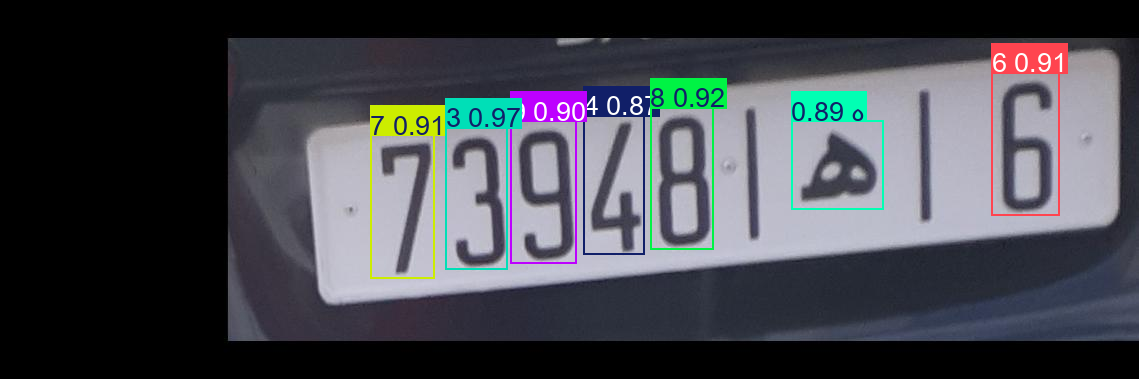

In [ ]:
# Tester le modèle sur une image
results = model.predict(source='/content/drive/MyDrive/OCR FINAL/DATA/images/test/20200626_121454b_trans.jpg', conf=0.5, save=True)

# Afficher les résultats
results[0].show()


In [ ]:
class_labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6',
    7: '7', 8: '8', 9: '9',
    10: 'أ', 11: 'ب', 12: 'ج', 13: 'د', 14: 'هـ', 15: 'و'  # Ajoute les lettres nécessaires
}

for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])
        label = class_labels.get(cls, 'Unknown')
        conf = box.conf[0]
        print(f"Caractère : {label}, Confiance : {conf:.2f}")


Caractère : 3, Confiance : 0.97
Caractère : 8, Confiance : 0.92
Caractère : 6, Confiance : 0.91
Caractère : 7, Confiance : 0.91
Caractère : 9, Confiance : 0.90
Caractère : هـ, Confiance : 0.89
Caractère : 4, Confiance : 0.87
